In [1]:
#sklearn
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.utils import np_utils 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline

#Others
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.environ["MODIN_ENGINE"] = "dask"
import pandas as pd
import root_pandas
import ROOT as R
sns.set_style('darkgrid')
%matplotlib inline

Using TensorFlow backend.


Welcome to JupyROOT 6.18/00


In [2]:
#Importing the dataset
#pd.set_option('display.float_format', lambda x: '%.8f' % x)
#d = root_pandas.read_root('/srv/data/hosein47/generic/generic_analysis_pi.root',key='pi')
d = root_pandas.read_root('/srv/data/hosein47/generic/generic_analysis_k.root',key='k')

In [3]:
df=d.iloc[:,6:]

In [4]:
df['mcPDG'] = df['mcPDG'].abs()

In [5]:
df = df.drop(df[df.mcPDG ==2212].index).drop(df[df.mcPDG ==0].index).drop(df[df.mcPDG ==1000010020].index).drop(df[df.mcPDG ==2205].index).drop(df[df.mcPDG ==3112].index).drop(df[df.mcPDG ==3312].index)

In [6]:
df.head()

,cosTheta,p,pt,E,mcPDG,pionID,electronID,muonID,kaonID,charge,isSignal
0,0.424436,0.338286,0.306304,0.598460,321.0,3.691511e-94,1.251730e-21,2.987872e-107,1.000000e+00,1.0,1.0
1,-0.060173,0.231595,0.231176,0.545301,211.0,9.622777e-01,1.189949e-07,3.772222e-02,2.134551e-16,1.0,0.0
2,-0.178286,0.355731,0.350032,0.608491,211.0,9.988040e-01,3.942761e-14,1.195971e-03,3.817626e-20,1.0,0.0
3,-0.117445,1.357424,1.348030,1.444409,11.0,2.890441e-07,9.999997e-01,0.000000e+00,2.945977e-22,1.0,0.0
4,0.159898,0.285231,0.281561,0.570152,321.0,5.231574e-151,2.024565e-63,9.949861e-186,1.000000e+00,-1.0,1.0


In [7]:
X_all = df.iloc[:,[0,2]].values
y_all = df.iloc[:,4].values
#lh=df.iloc[:,8]

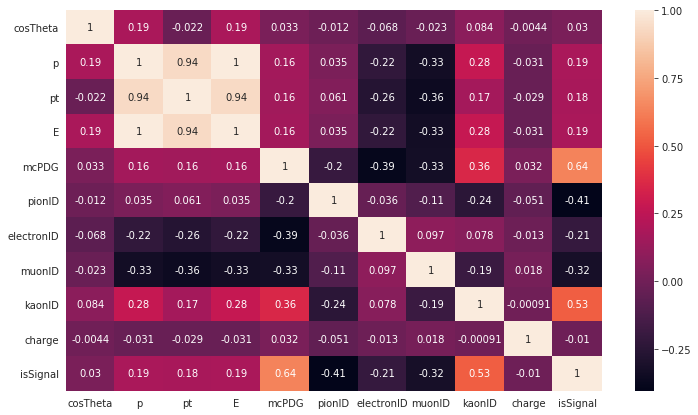

In [8]:
plt.figure(figsize=[12,7])
sns.heatmap(df.corr(method='spearman'), annot=True)

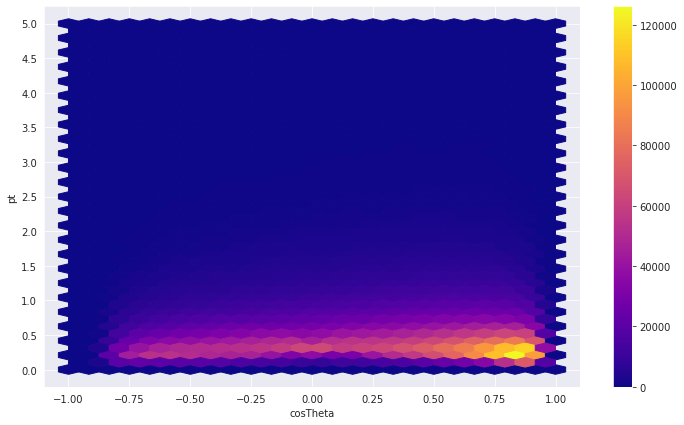

In [138]:
plt.figure(figsize=[12,7])
plt.hexbin(df[df['pt']<5]['cosTheta'], df[df['pt']<5]['pt'], gridsize=(24,24), cmap="plasma")
plt.colorbar()
plt.xlabel('cosTheta')
plt.ylabel('pt')
plt.yticks(np.arange(0, 5.5, step=0.5))
plt.show()

Text(0, 0.5, 'pt')

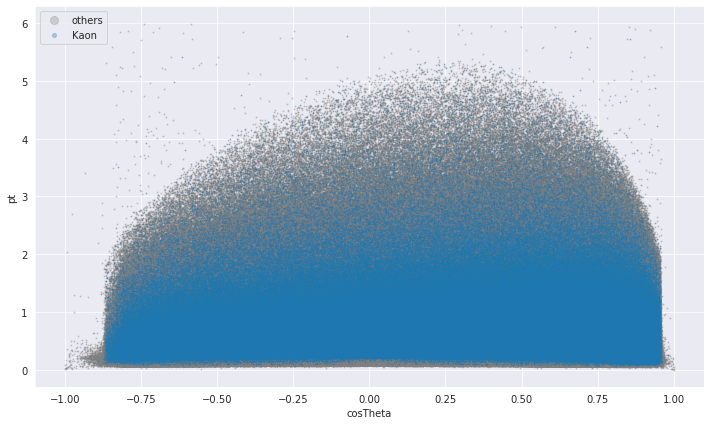

In [123]:
plt.figure(figsize=[12,7])
df_kaon = df[ df['mcPDG'] == 321]
df_pion = df[ df['mcPDG'] == 211]

# Plot the whole dataset
plt.plot( df[df['pt']<6]['cosTheta'], df[df['pt']<6]['pt'], linestyle='', marker='o', markersize=1, color="grey", alpha=0.3, label='others')
# Add the group to study
plt.plot( df_kaon[df_kaon['pt']<6]['cosTheta'], df_kaon[df_kaon['pt']<6]['pt'], 
         linestyle='', marker='o', markersize=0.5, alpha=0.3, label='Kaon')

plt.legend(markerscale=8, loc='upper left')
plt.xlabel('cosTheta')
plt.ylabel('pt')


Text(16.30000000000001, 0.5, 'pt')

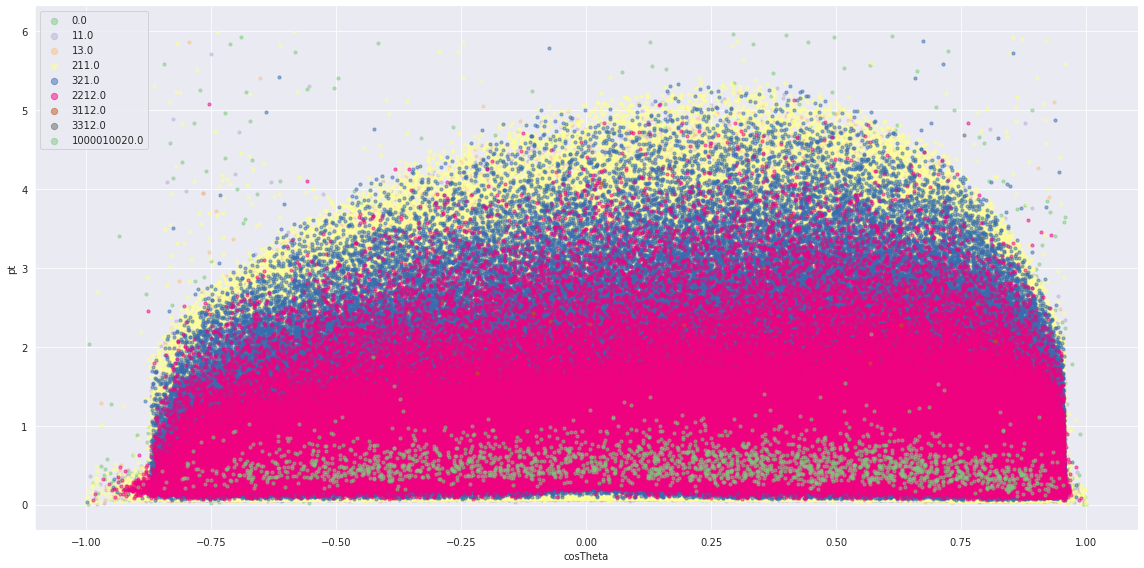

In [127]:
sns.lmplot( x='cosTheta', y='pt', data=df[df['pt']<6], fit_reg=False, hue= 'mcPDG', 
           legend=False, palette="Accent", scatter_kws={"alpha":0.5,"s":10}, height=8, aspect=2 )
 
# Legend
plt.legend(markerscale=2, loc='upper left')
 
# titles
plt.xlabel('cosTheta')
plt.ylabel('pt')

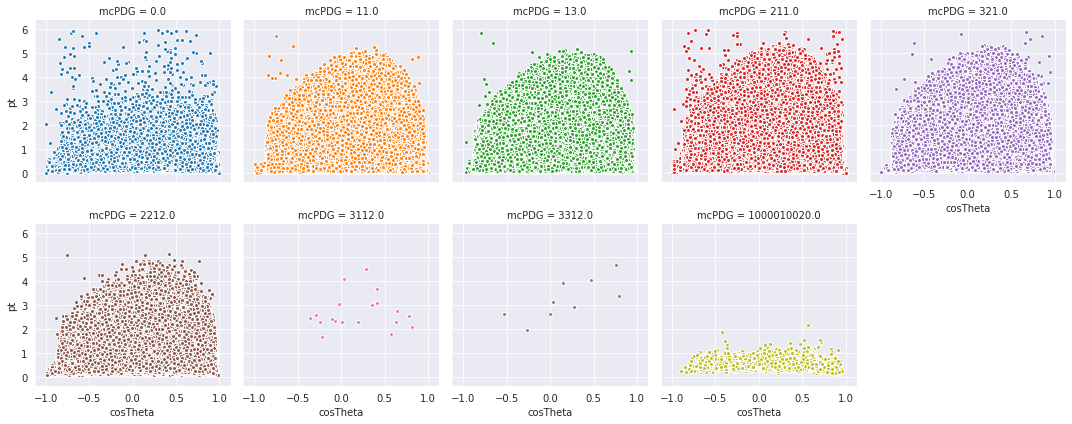

In [133]:
g = sns.FacetGrid(df[df['pt']<6], col="mcPDG", hue="mcPDG", col_wrap=5, height=3)
g = (g.map(plt.scatter, "cosTheta", "pt", edgecolor="w", s=16))

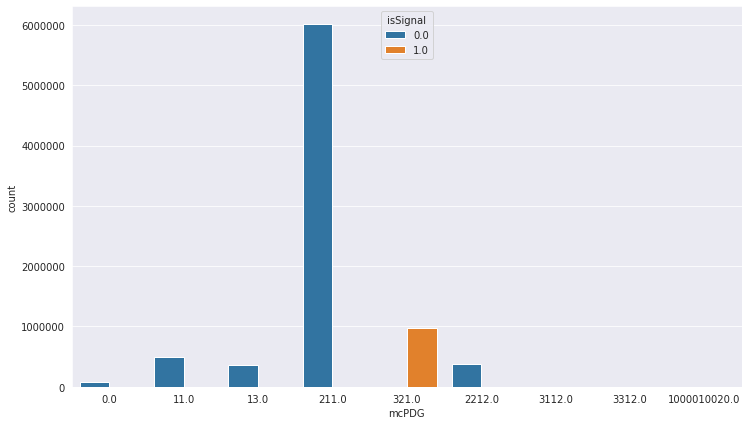

In [77]:
plt.figure(figsize=[12,7])
ax = sns.countplot(x="mcPDG", hue='isSignal' ,data=df)

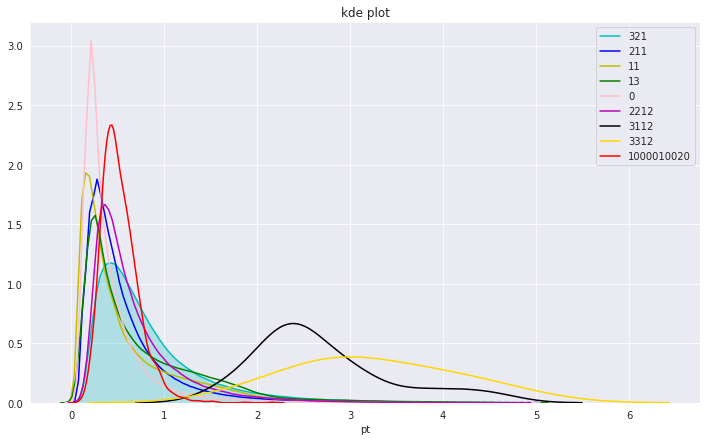

In [163]:
# plot of 2 variables
plt.figure(figsize=[12,7])
p1=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==321)]['pt'], shade=True, color="c", label=321)
p2=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==211)]['pt'], shade=False, color="b", label=211)
p3=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==11)]['pt'], shade=False, color="y",label=11)
p4=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==13)]['pt'], shade=False, color="g",label=13 )
p5=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==0)]['pt'], shade=False, color="pink", label=0)
p6=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==2212)]['pt'], shade=False, color="m", label=2212)
p7=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==3112)]['pt'], shade=False, color="k", label=3112)
p8=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==3312)]['pt'], shade=False, color="gold", label=3312)
p9=sns.kdeplot(df[(df['pt']<5) & (df['mcPDG']==1000010020)]['pt'], shade=False, color="r", label=1000010020)
plt.legend()
plt.title("kde plot")
plt.xlabel('pt')
plt.show()


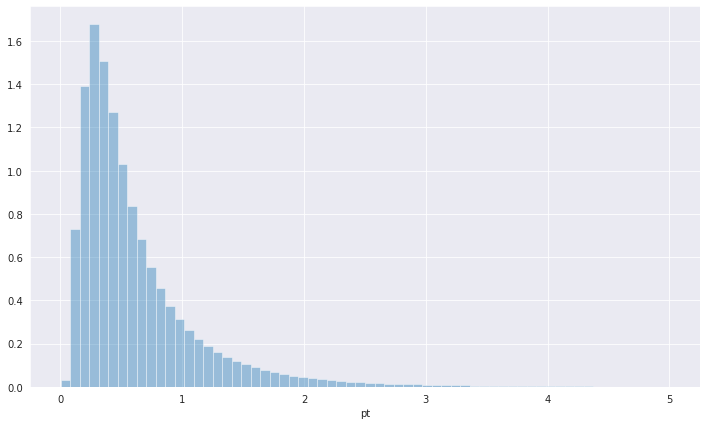

In [165]:
plt.figure(figsize=[12,7])
sns.distplot(df[df['pt']<5]['pt'], kde=False, bins=64, hist_kws=dict(density=True, log=False) )

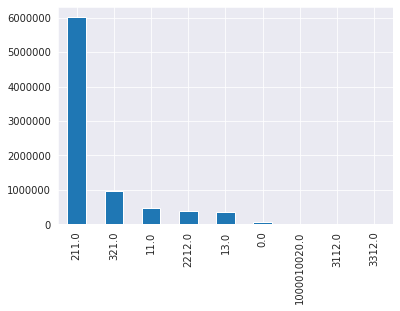

In [79]:
df['mcPDG'].value_counts().plot(kind='bar')

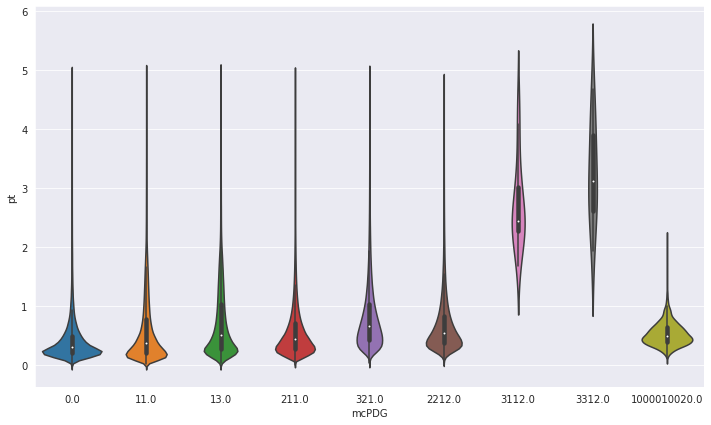

In [166]:
plt.figure(figsize=[12,7])
box=sns.violinplot(df['mcPDG'], y=df[df['pt']<5]['pt'])
plt.show()

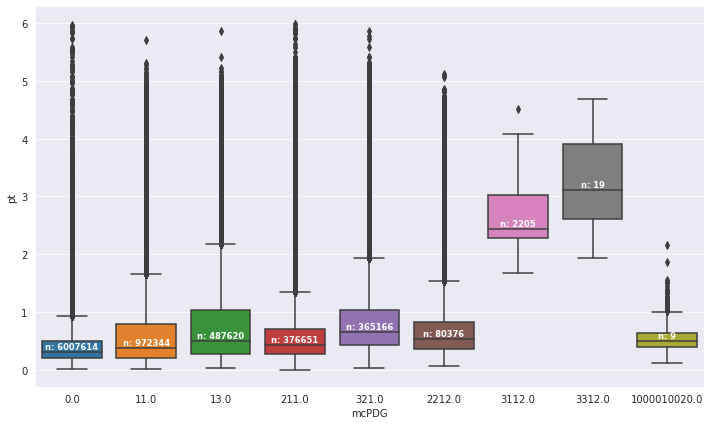

In [101]:
plt.figure(figsize=[12,7])
box=sns.boxplot(df['mcPDG'], y=df[df['pt']<6]['pt'])

# Calculate number of obs per group & median to position labels
medians = df.groupby(['mcPDG'])['pt'].median().values
nobs = df['mcPDG'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    box.text(pos[tick], medians[tick] + 0.05, nobs[tick],
    horizontalalignment='center', size='small', color='w', weight='semibold')
 
plt.show()

In [168]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df=pd.DataFrame(enc.fit_transform(df[['mcPDG']]).toarray())
enc_df.head(10)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df=df.merge(enc_df, how='outer', left_index=True, right_index=True)

In [25]:
y = df.iloc[:,11:20].values

In [28]:
from collections import Counter
counter = Counter(y_all)
print(counter)

Counter({211.0: 6007614, 321.0: 972344, 11.0: 487620, 2212.0: 376651, 13.0: 365166, 0.0: 80376, 1000010020.0: 2205, 3112.0: 19, 3312.0: 9})


/home/hosein47/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  after removing the cwd from sys.path.


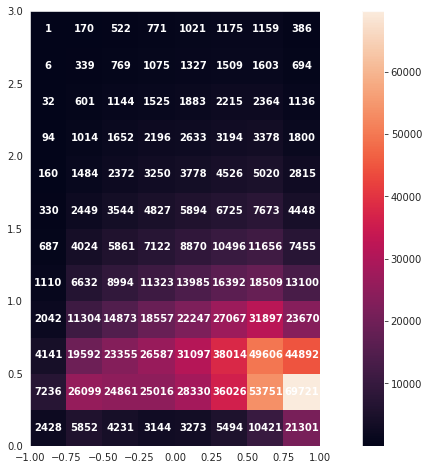

In [9]:
#Find out the number of sgnals in each bin
plt.figure(figsize=[15,8])

H_signal, xedges_1, yedges_1,im = plt.hist2d(x=df['cosTheta'], y=df['pt'], bins=(8,12), range=[[-1, 1], [0, 3]], weights=df['isSignal']==1, normed=False)
extent = [0,3, 1, -1]
plt.imshow(H_signal, extent=extent,interpolation='nearest')

for i in range(len(xedges_1)-1):
    for j in range(len(yedges_1)-1):
        plt.text(xedges_1[i]+0.125,yedges_1[j]+0.125, int(H_signal[i,j]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.show()

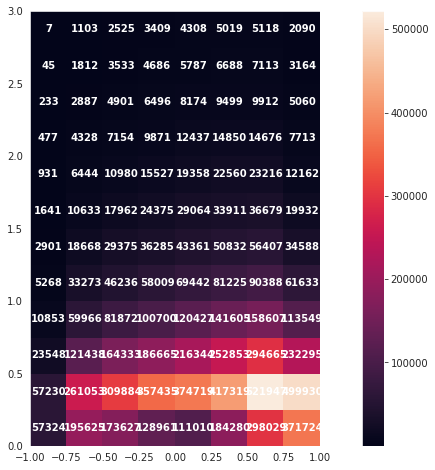

In [10]:
#Find out the number of all points in each bin including both signal and background
plt.figure(figsize=[15,8])

H_all, xedges_2, yedges_2 ,im = plt.hist2d(x=df['cosTheta'],y=df['pt'], bins=(8,12),range=[[-1, 1], [0, 3]])
extent = [0,3, 1, -1]
plt.imshow(H_all, extent=extent,interpolation='nearest')

for i in range(len(xedges_2)-1):
    for j in range(len(yedges_2)-1):
        plt.text(xedges_2[i]+0.125,yedges_2[j]+0.125, int(H_all[i,j]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.show()

/home/hosein47/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  after removing the cwd from sys.path.


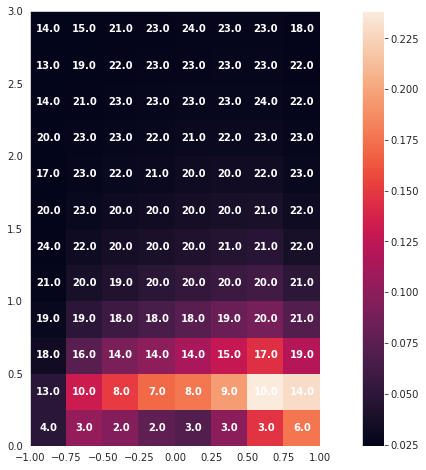

In [11]:
#The number of signals over the number of background which is the prior
plt.figure(figsize=[15,8])

H_signal, xedges, yedges, im = plt.hist2d(x=df['cosTheta'], y=df['pt'], bins=(8,12), range=[[-1, 1], [0, 3]], weights=df['isSignal']==1,normed=False)
H_all, xedges, yedges, im = plt.hist2d(x=df['cosTheta'],y=df['pt'], bins=(8,12),range=[[-1, 1], [0, 3]])
extent = [0,3, 1, -1]
plt.imshow(H_signal/H_all, extent=extent,interpolation='nearest')

for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        plt.text(xedges[i]+0.125,yedges[j]+0.125, np.around((np.nan_to_num(H_signal/H_all))[i,j]*100,decimals=0), 
                 color="w", ha="center", va="center", fontweight="bold")
plt.colorbar()
plt.show()

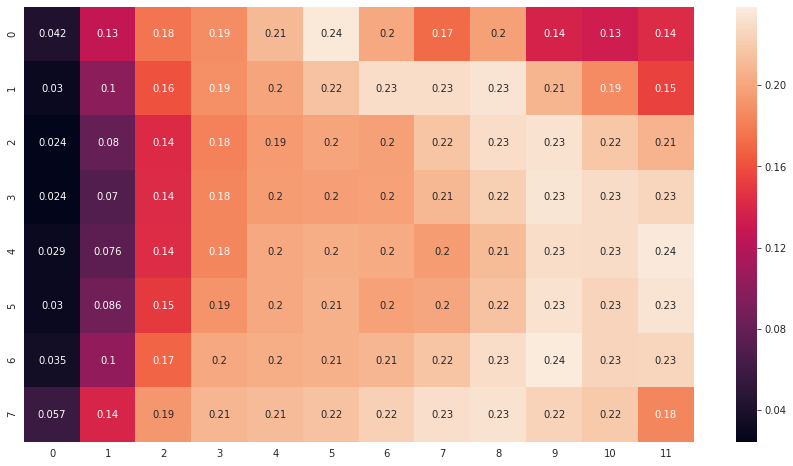

In [12]:
#transfering the info to a dataframe
plt.figure(figsize=[15,8])
H1=pd.DataFrame(H_signal)
H2=pd.DataFrame(H_all)
prior=(H1/H2)
prior.replace(np.nan, 0, inplace=True)
sns.heatmap(prior, annot=True)